<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/develop/spx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as dp
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
!gdown  '19g5FnCw4sum6y5l0jT0YqTeLVauhhplc'

Downloading...
From: https://drive.google.com/uc?id=19g5FnCw4sum6y5l0jT0YqTeLVauhhplc
To: /content/SPX.xlsx
100% 1.30M/1.30M [00:00<00:00, 10.2MB/s]


In [3]:
!ls


sample_data  SPX.xlsx


In [7]:
df = pd.read_excel('SPX.xlsx')
df.head()

,Date,VIX Index - Last Price (L1),(R1) Open,(R1) High,(R1) Low,(R1) Close,SMAVG (5) on Close,UBB(2),BollMA (20) on Close,LBB(2),...,"Moving Average(Exponential,14)",RSI,Moving Average,BollW (SPX),%B (SPX),ATR(5) (SPX),"MACD(12,26)",Sig(9),Diff,OBV (SPX)
0,1999-01-04,26.17,1229.23,1248.81,1219.10,1228.10,1231.31,1253.41,1195.63,1137.84,...,86.8404,64.9984,62.5017,9.6663,0.7810,19.4208,22.9841,21.0342,1.9499,8.372369e+09
1,1999-01-05,24.46,1228.10,1246.11,1228.10,1244.78,1235.17,1259.90,1199.03,1138.16,...,87.6740,69.0716,64.0759,10.1527,0.8758,18.9505,23.6879,21.5650,2.1229,9.091570e+09
2,1999-01-06,23.34,1244.78,1272.50,1244.78,1272.34,1241.28,1271.69,1203.26,1134.83,...,88.4970,74.3773,65.5572,11.3738,1.0048,21.8737,26.1679,22.4856,3.6823,9.993368e+09
3,1999-01-07,24.37,1272.34,1272.34,1257.68,1269.73,1248.84,1281.11,1207.68,1134.25,...,89.2929,73.0984,66.9682,12.1607,0.9225,19.4691,27.6045,23.5093,4.0952,9.213530e+09
4,1999-01-08,23.28,1269.73,1278.05,1261.85,1275.09,1258.01,1290.36,1212.26,1134.16,...,90.0349,74.0840,68.0927,12.8856,0.9022,18.3794,28.8430,24.5761,4.2670,1.005420e+10


In [9]:
df.columns


Index(['Date', 'VIX Index - Last Price  (L1)', '(R1) Open', '(R1) High',
       '(R1) Low', '(R1) Close', 'SMAVG (5)  on Close', 'UBB(2)',
       'BollMA (20)  on Close', 'LBB(2)', 'SMAVG (50)  on Close',
       'SMAVG (10)  on Close', 'SMAVG (20)  on Close', 'SPX Index - Volume',
       'SMAVG (15)', 'Mom(10)', 'MomMA(5)', 'RMI(Close,14,10)',
       'Moving Average(Exponential,14)', 'RSI', 'Moving Average',
       'BollW (SPX)', '%B (SPX)', 'ATR(5) (SPX)', 'MACD(12,26)', 'Sig(9)',
       'Diff', 'OBV (SPX)'],
      dtype='object')

In [8]:
df.describe()


,Date,VIX Index - Last Price (L1),(R1) Open,(R1) High,(R1) Low,(R1) Close,SMAVG (5) on Close,UBB(2),BollMA (20) on Close,LBB(2),...,"Moving Average(Exponential,14)",RSI,Moving Average,BollW (SPX),%B (SPX),ATR(5) (SPX),"MACD(12,26)",Sig(9),Diff,OBV (SPX)
count,5104,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,...,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5.103000e+03
mean,2009-02-22 02:22:11.661441792,19.882067,1512.997353,1521.853786,1503.460337,1513.211442,1512.557384,1555.165428,1510.104934,1465.044488,...,59.372190,53.408279,53.406356,6.422911,0.561440,19.011107,2.268886,2.262289,0.006598,9.853585e+10
min,1999-01-04 00:00:00,9.140000,679.280000,695.270000,666.790000,676.530000,690.330000,806.270000,736.970000,648.980000,...,1.782100,13.638900,25.351600,1.049500,-0.466800,5.007700,-77.496300,-71.049400,-30.572300,-7.438235e+10
25%,2004-01-29 18:00:00,13.700000,1155.400000,1163.565000,1144.715000,1155.415000,1153.810000,1194.915000,1152.730000,1116.735000,...,39.590000,45.442800,46.704850,3.752850,0.296100,12.354400,-5.574650,-5.139600,-2.715950,7.981041e+09
50%,2009-02-24 12:00:00,18.020000,1339.390000,1348.000000,1329.880000,1339.130000,1339.150000,1379.240000,1336.810000,1294.620000,...,63.161800,54.222900,54.010500,5.440700,0.629600,16.539800,4.899200,4.723100,-0.002900,1.026588e+11
75%,2014-03-20 06:00:00,23.685000,1855.535000,1868.315000,1841.985000,1855.865000,1856.905000,1887.705000,1858.640000,1820.710000,...,81.443200,61.704200,60.318500,7.658400,0.830150,22.332500,12.495400,11.942200,2.693300,1.948018e+11
max,2019-04-15 00:00:00,80.860000,2936.760000,2940.910000,2927.110000,2930.750000,2920.660000,3006.440000,2908.070000,2878.600000,...,99.747100,86.686700,81.377100,42.101900,1.290700,90.076800,47.662600,43.182500,21.919100,2.318354e+11
std,NaN,8.443696,517.394098,517.959428,516.739731,517.471768,516.585790,520.287424,513.614019,508.291548,...,25.323194,11.111542,9.326286,4.212506,0.326064,10.168503,15.147814,14.172392,4.758376,9.399576e+10


In [14]:
df['% Diff'] = abs(df['(R1) Close'].pct_change()) * 100

<ipython-input-14-293a17ff1147>:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['% Diff'] = abs(df['(R1) Close'].pct_change()) * 100


In [15]:
df['% Diff'].head()

,% Diff
0,NaN
1,1.358196
2,2.214046
3,0.205134
4,0.422137


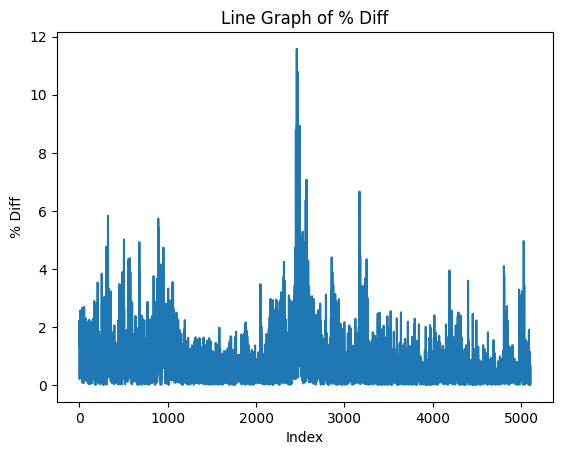

In [19]:
plt.plot(df['% Diff'])
plt.xlabel('Index')
plt.ylabel('% Diff')
plt.title('Line Graph of % Diff')
plt.show()